<a href="https://colab.research.google.com/github/gmacuare/COVID-19/blob/master/Sponsor_by_Staff_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sponsor by Staff/Europcar Staff report automation**
<p align = "justify"> The intention on this notebook is to reduce the time spent when loading the database into Google data studio for the report to be updated.

This report will:
- Clean the data, removing unnacepted characters.
- Will replace the name of columns for better visualisation in the report.
- Will remove the rows where no revenue is available and fill with 'Unknown' where have neither the driver nor the staff name are available.
- Will join both dataframes into one single spreadsheet and that would be taken as the data source for Google data Studio </p>
--- 


## Process to follow to update the report:
You have to upload the files **"Sponsor_2020_BBDD.zip"** and **"Sponsor_2020_BBDD.zip"** to google drive <br><br>

- Source Folder (Server): 

 **/1. Informes/1. Entrada de negocio/Intermediacion Pricing/Sponsor by Staff**

- Destination Folder (Drive): <br>
  /content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Zip <br><br>
  


Below and Image for your reference about where to locate the folder in the drive.<br><br>
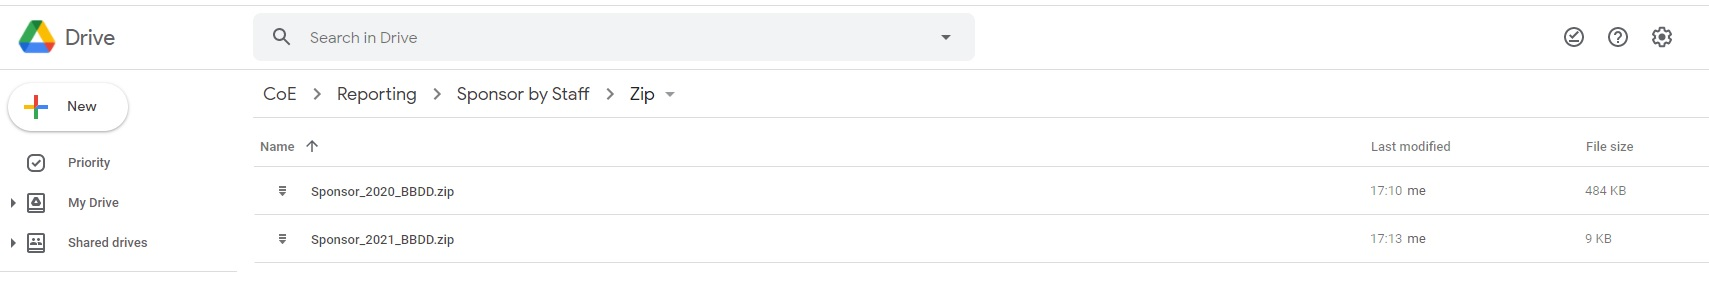 <br><br>

Lastly, to finish the process you will only have to press '**Ctrl + F9**' and it will run the code below, at this point you will have to press on the link as shown in the example below, select your gmail account to login , allow ,copy the code and introduce it in the box where it says "enter verification code" <br><br>





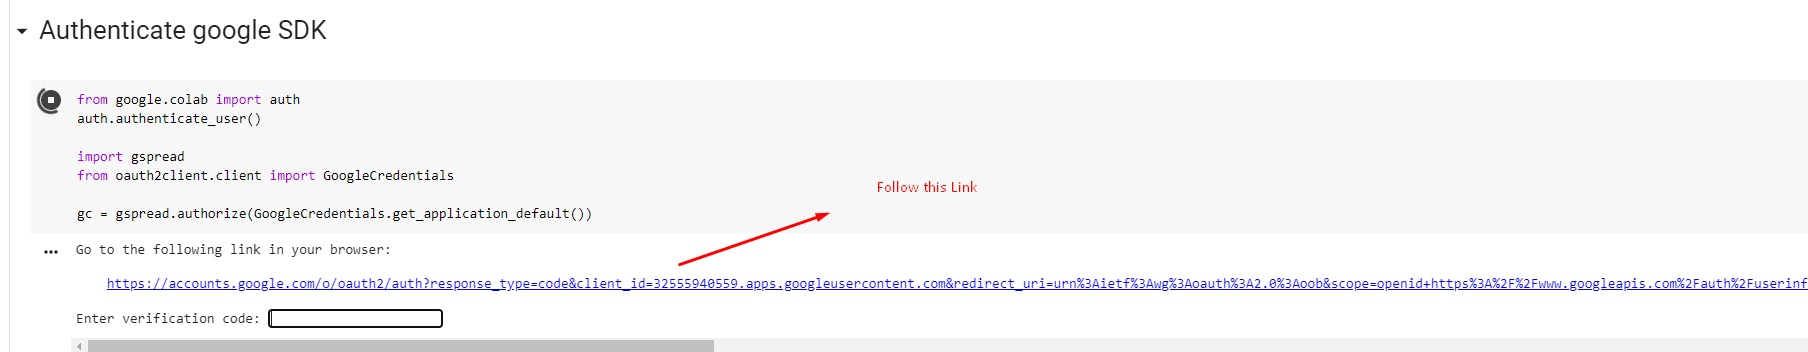 <br><br>


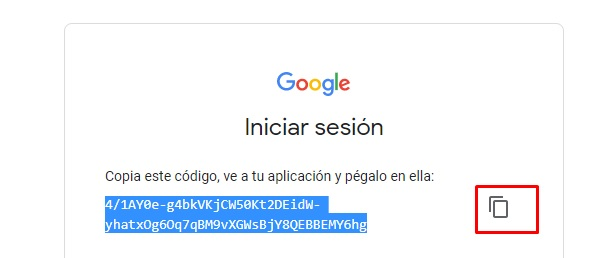


. After that, just go to the Google data Report in the link below, press the refresh button and the report will be working with the up to date data 



>>You can access the final report under this link:
[Sponsor /Staff Bookings Analysis 2021](https://datastudio.google.com/u/0/reporting/e891f2b5-6d3c-44f1-a3af-c29199c6bb09/page/Lr6JB/edit)



# Adding libraries neeeded


In [1]:
#@title
!pip install --upgrade gspread
from google.colab import output
import pandas as pd
import numpy as np
import time
from datetime import timedelta, date 
from datetime import datetime as dt
import os
import glob
from zipfile import ZipFile
output.clear()

#Authenticate google SDK

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())


#Extract Zipfiles


In [3]:
 !unzip -o "/content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Zip/Sponsor_2020_BBDD.zip" -d "/content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Unzip/Sponsor BBDD 2020"

 
 !unzip -o "/content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Zip/Sponsor_2021_BBDD.zip" -d "/content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Unzip/Sponsor BBDD 2021"




Archive:  /content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Zip/Sponsor_2020_BBDD.zip
  inflating: /content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Unzip/Sponsor BBDD 2020/Report 1.csv  
Archive:  /content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Zip/Sponsor_2021_BBDD.zip
  inflating: /content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Unzip/Sponsor BBDD 2021/Report 1.csv  


# Importing CSV


In [4]:
df2020 = pd.read_csv('/content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Unzip/Sponsor BBDD 2020/Report 1.csv',sep=",", parse_dates=['Date of reservation creation date','Projected Checkout date'],
                  dtype={'Contract Id': 'object', }, thousands=",", decimal=".")

df2021 = pd.read_csv('/content/drive/Shareddrives/CoE/Reporting/Sponsor by Staff/Unzip/Sponsor BBDD 2021/Report 1.csv',sep=",", parse_dates=['Date of reservation creation date','Projected Checkout date'],
                 dtype={'Contract Id': 'object', }, thousands=",", decimal=".")


#df2021.dtypes
#df2020

#df.drop(df.head(0).index, inplace=True)
#df2021.head()


#Cleaning Data, dropping null values and Joining dataframes

In [5]:


#loop for 2020 - 2021 dataframes

for year in ['2020','2021']:

  #Dropping Null values
  globals()[f"df{year}"][['Reservation Driver First Name','Reservation Driver Surname','Reservation Staff Name','CO Country Code']] = globals()[f"df{year}"][['Reservation Driver First Name','Reservation Driver Surname','Reservation Staff Name','CO Country Code']].fillna(value='Unknown')
  globals()[f"df{year}"] = globals()[f"df{year}"].dropna(subset = ['Projected Net Revenue - Euro', 'Revenue Per Day - Euro']) #remove rows where there are null values on those columms

  #cleaning column invalid characters
  globals()[f"df{year}"].columns = map(str.lower, globals()[f"df{year}"].columns)
  globals()[f"df{year}"].columns = globals()[f"df{year}"].columns.str.replace(".", "")
  globals()[f"df{year}"].columns = globals()[f"df{year}"].columns.str.replace("- ", "")
  globals()[f"df{year}"].columns = globals()[f"df{year}"].columns.str.replace(" ", "_")

  #datetime settings
  globals()[f"df{year}"]['date_of_reservation_creation_date'] = pd.to_datetime(globals()[f"df{year}"]['date_of_reservation_creation_date']).dt.strftime("%Y%m%d").astype('datetime64[ns]')
  globals()[f"df{year}"]['projected_checkout_date'] = pd.to_datetime(globals()[f"df{year}"]['projected_checkout_date']).dt.strftime("%Y%m%d").astype('datetime64[ns]')
  globals()[f"df{year}"]['year_reservation_creation_date'] = globals()[f"df{year}"]['date_of_reservation_creation_date'].dt.year
  globals()[f"df{year}"]['year_reservation_creation_date'] = globals()[f"df{year}"]['year_reservation_creation_date'].astype(int)
  globals()[f"df{year}"]['week_of_res_creation_date'] = globals()[f"df{year}"]['date_of_reservation_creation_date'].dt.isocalendar().week
  globals()[f"df{year}"][['reservation_number','booked_vehicle_type']] = globals()[f"df{year}"][['reservation_number','booked_vehicle_type']].astype(str)


# Join dataframes
df = pd.concat([df2020, df2021], axis=0, ignore_index=True)

#df.dtypes
#df.head()

#df.isnull().sum() #To check if there are null values

# Renaming Column Names

In [6]:

df = df.rename(columns = {'reservation_driver_first_name': 'Driver Name', 'reservation_driver_surname': 'Driver Surname', 'reservation_number': 'Bookings', 'projected_net_revenue_euro': 'Revenue', 
                                  'revenue_per_day_euro': 'Rev per day', 'reservation_status': 'Reservation Status', 'year_reservation_creation_date': 'Booking Year', 
                                  'week_of_res_creation_date': 'Booking Week', 'date_of_reservation_creation_date': 'Booking Date', 'projected_checkout_date': 'CO Date', 'proj_duration_in_days': 'Days',
                                  'sipp-code': 'SIPP', 'booked_vehicle_type': 'Booked Vehicle Type', 'checkout_station_id': 'CO Station ID', 'checkout_station_name': 'CO Station',
                                  'contract_id': 'Contract', 'contract_name': 'Contract Name', 'co_country_code': 'CO Country', 'distribution_channel_description': 'Distribution Channel',
                                  'reservation_staff_name': 'Reservation Staff Name', 'reservation_staff_user_id': 'Reservation Staff ID'}, inplace = False)  # ojo cuando pongo el inplace false esta haciendo una copia del DF

#df.columns
#df.dtypes

# Open and Paste to Google Sheet

In [7]:
# Open google sheet
sheet2021 = gc.open_by_key('1usws4RHX8ZZo6u6HleXA8CrBcpj9XmoPCo73xDX3Sak')
#sheet2020 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1usws4RHX8ZZo6u6HleXA8CrBcpj9XmoPCo73xDX3Sak/edit#gid=0')



#Change datetimes to string to avoid JSON compatibility issues
df[['Booking Date', 'CO Date','Booking Year','Booking Week']] = df[['Booking Date', 'CO Date','Booking Year','Booking Week']].astype(str)

#print(df2020.values)

# Update figures sheet
ws = sheet2021.get_worksheet(0)
ws.clear()
ws.update([df.columns.values.tolist()] + df.values.tolist())

print('The sheet for the GDS report has been created, you can now follwow the link shown above to update the report')



The sheet for the GDS report has been created, you can now follwow the link shown above to update the report
